In [1]:
# importing pandas
import pandas as pd

In [2]:
# importing numpy
import numpy as np

In [3]:
# importing numpy
import matplotlib.pyplot as plt

In [14]:
# path = "~/project_files/prism-modelling-l4/shut-the-box-game/"
# f = open(path + "stb_rmax.tra", "r")

In [4]:
# Read Text Files with Pandas using read_csv()
  
# read text file into pandas DataFrame
df = pd.read_csv("~/project_files/prism-modelling-l4/pig-dice-game/analysis/pd_ws25.sta", sep="\s+|:\(|,|\(|\)|:", engine="python", usecols = [i for i in range(1,7)])

# get_array
stb_sta = df.values

# upload transition file into numpy array
stb_tra = np.loadtxt("./analysis/pd_ws25.tra", delimiter=" ", skiprows=1, dtype={'names': ('state_number', 'action'),
'formats': ('i4','S3')})

print(df)

states = np.loadtxt("./analysis/pd_ws25.tra", delimiter=" ", skiprows=1, usecols=0, dtype=int)
actions = np.loadtxt("./analysis/pd_ws25.tra", delimiter=" ", skiprows=1, usecols=1, dtype=str)

       turn  score1  score2  tscore1  tscore2  winner
0         1       0       0        0        0       0
1         1       0       0        4        0       0
2         1       0       0        5        0       0
3         1       0       0        6        0       0
4         1       0       0        7        0       0
...     ...     ...     ...      ...      ...     ...
22261     2      24      24        0       23       0
22262     2      24      24        0       24       0
22263     2      24      24        0       25       0
22264     3       0       0        0        0       1
22265     3       0       0        0        0       2

[22266 rows x 6 columns]


In [16]:
# Read Text Files with Pandas using read_csv()
  
# read text file into pandas DataFrame for minimum reward states
# df = pd.read_csv("~/project_files/prism-modelling-l4/shut-the-box-game/stb_rmin.sta", sep="\s+|:\(|,|\(|\)|:", engine="python", usecols = [i for i in range(1,12)])

# # get_array
# stb_sta = df.values

# print(stb_sta)

# states = np.loadtxt("stb_rmin.tra", delimiter=" ", skiprows=1, usecols=(0,2), dtype=int)
# trans_prblty = np.loadtxt("stb_rmin.tra", delimiter=" ", skiprows=1, usecols=3, dtype=float)
# actions = np.loadtxt("stb_rmin.tra", delimiter=" ", skiprows=1, usecols=4, dtype=str)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [2 0 1 ... 1 0 1]
 [2 0 1 ... 1 1 0]
 [2 0 1 ... 1 1 1]]


In [8]:
# Data Analysis Starts Here

#Note: if closing of boxes decision also has to be removed then try combinations of most popular moves.

#cases where player 1 decides to not throw dice and end turn
notthrow1_action = np.where(actions == "notthrow1")
print(notthrow1_action)

#all states where two dice is thrown
states_notthrow1 = states[notthrow1_action]
print("States number when player 1 decides to not throw: ",states_notthrow1)
count_notthrow1 = states_notthrow1.shape[0]
print("Count of states when player 1 decides to not throw: ", count_notthrow1)

# information about the states where two dice is thrown
#i.e what box pieces are covered
notthrow2_action = np.where(actions == "notthrow2")
print("Count of states when player 2 decides to not throw: ",notthrow2_action)

#all states where player 2 does not throw
states_notthrow2 = states[notthrow2_action]
print(states_notthrow2)
count_notthrow2 = states_notthrow2.shape[0]
print(count_notthrow2)

sta_notthrow1 = stb_sta[states_notthrow1]
print("States information for states where player 1 decides to not throw\n")
print(sta_notthrow1)

# np.savetxt("sta_2d.txt", sta_2d_info, delimiter=",", fmt="%d")
# #this shows that almost never 1 & 2 are filled on a sum caused by two dice
# #so, second strategy would be to not cover 1 & 2 whenever a result from two dice is thrown, 
# #whilst throwing results on two dice until 7,8,9 are covered. So don't close combinations the include 1 or 2
# #print(sta_2d_info)

# # check if in all states 12 are 0
# sta1 = sta_2d_info[sta_2d_info[:,2]==0]
# count1 = sta1.shape[0]

# sta9 = sta_2d_info[sta_2d_info[:,10]==1]
# sta8 = sta9[sta9[:,9]==1]
# sta7 = sta8[sta8[:,8]==1]
# count789 = sta7.shape[0]
# print("States where two dice is thrown after 7,8,9 pieces have been closed ", sta7)
# print("Count of states where two dice is thrown after 7,8,9 pieces have been closed ", count789)

(array([   22,    45,    68, ..., 11129, 11130, 11131]),)
States number when player 1 decides to not throw:  [   22    45    68 ... 11129 11130 11131]
Count of states when player 1 decides to not throw:  6820
Count of states when player 2 decides to not throw:  (array([11154, 11173, 11174, ..., 22261, 22262, 22263]),)
[11154 11173 11174 ... 22261 22262 22263]
6820
States information for states where player 1 decides to not throw

[[ 1  0  0 25  0  0]
 [ 1  0  4 25  0  0]
 [ 1  0  5 25  0  0]
 ...
 [ 1 24 24 23  0  0]
 [ 1 24 24 24  0  0]
 [ 1 24 24 25  0  0]]


In [9]:
# #cases where one die are thrown
# one_die_in = np.where(actions == "one")

# #all states where one die is thrown
# states_one_die = states[one_die_in][:,0]

# #information about the states where one die is thrown
# #i.e what box pieces are covered
# sta_1d_info = stb_sta[states_one_die]
# print(sta_1d_info)
# np.savetxt("sta_1d.txt", sta_1d_info, delimiter=",", fmt="%d")

# #count of all the states where 1 die is thrown as opposed to 2 dice
# #in the states where 1 die is thrown it is a choice between 1 or 2
# count_1d = states_one_die.shape[0]

# #plot the count
# # y = np.array([count_1d, count789, count_2d])
# # x = np.array(['one', two, 'all_two'])


In [20]:
# try some plots

# Create figure and subplot

# Plot the score of player 2
# against the score for player 1 when player 1 decides to no throw


# # fig = plt.figure()
# # ax = fig.add_axes([0,0,1,1])
# x_turnpl1 =  sta_notthrow1[:,3]
# x_scorepl1 =  sta_notthrow1[:,1]
# print("The score of player 1: ",x_scorepl1)
# y_scorepl2 =  sta_notthrow1[:,2]
# print("The score of player 2: ",y_scorepl2)
# #find line of best fit
# a, b = np.polyfit(x_turnpl1, y_scorepl2, 1)
# #add points to plot
# plt.scatter(x_turnpl1, y_scorepl2)
# #add line of best fit to plot
# plt.plot(x_turnpl1, a*x_turnpl1+b)

# langs = ['Die', '2 Dice']
# count_d = np.array([count_1d, count789])

# ax.bar(langs,count_d)

# plt.show()

# The games rules state that until 7,8,9 the player has to throw 2 dice. After the 7,8,9 box pieces are filled
# the player can decide whether to throw a die or two dice. It can be seen here that in this case almost twice 
# as much times throwing 1 die is prefered. Therefore, a strategy to try is throwing 1 die the moment 7,8,9 are
# box pieces are filled.

In [34]:
# function that @returns numbers of occurrences
# for a @param action_str the action string
import os

def a_state_notthrow(a_str, score):
    act_in = np.where(actions == a_str)
    #all states 
    sta_act = states[act_in]
    sta_act_info = stb_sta[sta_act]
    directory = "./analysis/intermediate_files"
    file = "sta_ws"+str(score)+"_"+a_str+".txt"
    path = os.path.join(directory,file)
    np.savetxt(path, sta_act_info, delimiter=",", fmt="%d")
    c_sta = sta_act.shape[0]
    return c_sta


In [35]:
# find most popular action for each sum

# function that @returns numbers of occurrences
# for a @param action_str the action string

# def a_count(a_str):
#     sum12_in = np.where(actions == a_str)
#     #all states 
#     sta_sum12 = states[sum12_in][:,0]
#     sta_12_info = stb_sta[sta_sum12]
#     file = "sta_"+a_str+".txt"
#     np.savetxt(file, sta_12_info, delimiter=",", fmt="%d")
#     c_sta = sta_sum12.shape[0]
#     return c_sta

#action = notthrow1
a_str = "notthrow1"
print('times notthrow1 action was chosen:', a_state_notthrow(a_str, 25))

# a_str = "c1236"
# print('times c1236 action was chosen:', a_count(a_str, 12))

# a_str = "c345"
# print('times 345 action was chosen:', a_count(a_str, 12))

# a_str = "c246"
# print('times 246 action was chosen:', a_count(a_str, 12))

# a_str = "c237"
# print('times 237 action was chosen:', a_count(a_str, 12))

# a_str = "c156"
# print('times 156 action was chosen:', a_count(a_str, 12))

# a_str = "c147"
# print('times 147 action was chosen:', a_count(a_str, 12))

# a_str = "c138"
# print('times 138 action was chosen:', a_count(a_str, 12))

# a_str = "c129"
# print('times 129 action was chosen:', a_count(a_str, 12))

# a_str = "c57"
# print('times c57 action was chosen:', a_count(a_str, 12))

# a_str = "c48"
# print('times c48 action was chosen:', a_count(a_str, 12))

# a_str = "c39"
# print('times c39 action was chosen:', a_count(a_str, 12))

times notthrow1 action was chosen: 6820


In [40]:
#sum11
# a_str = "c1235"
# print('times c1235 action was chosen:', a_count(a_str, 11))

# a_str = "c245"
# print('times c245 action was chosen:', a_count(a_str, 11))

# a_str = "c236"
# print('times c236 action was chosen:', a_count(a_str, 11))

# a_str = "c146"
# print('times c146 action was chosen:', a_count(a_str, 11))

# a_str = "c137"
# print('times c137 action was chosen:', a_count(a_str, 11))

# a_str = "c128"
# print('times c128 action was chosen:', a_count(a_str, 11))

# a_str = "c56"
# print('times c56 action was chosen:', a_count(a_str, 11))

# a_str = "c47"
# print('times c47 action was chosen:', a_count(a_str, 11))

# a_str = "c38"
# print('times c38 action was chosen:', a_count(a_str, 11))

# a_str = "c29"
# print('times c29 action was chosen:', a_count(a_str, 11))

times c1235 action was chosen: 30
times c245 action was chosen: 31
times c236 action was chosen: 34
times c146 action was chosen: 38
times c137 action was chosen: 43
times c128 action was chosen: 37
times c56 action was chosen: 40
times c47 action was chosen: 53
times c38 action was chosen: 45
times c29 action was chosen: 34


In [14]:
#sum10
# a_str = "c1234"
# print('times c1234 action was chosen:', a_count(a_str))

# a_str = "c145"
# print('times c145 action was chosen:', a_count(a_str))

# a_str = "c136"
# print('times c136 action was chosen:', a_count(a_str))

# a_str = "c127"
# print('times c127 action was chosen:', a_count(a_str))

# a_str = "c235"
# print('times c235 action was chosen:', a_count(a_str))

# a_str = "c46"
# print('times c46 action was chosen:', a_count(a_str))

# a_str = "c37"
# print('times c37 action was chosen:', a_count(a_str))

# a_str = "c28"
# print('times c28 action was chosen:', a_count(a_str))

# a_str = "c19"
# print('times c19 action was chosen:', a_count(a_str))

TypeError: a_count() missing 1 required positional argument: 'num'

In [12]:
#sum9
# a_str = "c234"
# print('times c234 action was chosen:', a_count(a_str))

# a_str = "c135"
# print('times c135 action was chosen:', a_count(a_str))

# a_str = "c126"
# print('times c126 action was chosen:', a_count(a_str))

# a_str = "c45"
# print('times c45 action was chosen:', a_count(a_str))

# a_str = "c36"
# print('times c36 action was chosen:', a_count(a_str))

# a_str = "c27"
# print('times c27 action was chosen:', a_count(a_str))

# a_str = "c18"
# print('times c18 action was chosen:', a_count(a_str))

# a_str = "c9"
# print('times c9 action was chosen:', a_count(a_str))

times c234 action was chosen: 47
times c135 action was chosen: 50
times c126 action was chosen: 53
times c45 action was chosen: 48
times c36 action was chosen: 52
times c27 action was chosen: 63
times c18 action was chosen: 53
times c9 action was chosen: 73


In [13]:
#sum8
# a_str = "c134"
# print('times c134 action was chosen:', a_count(a_str))

# a_str = "c125"
# print('times c125 action was chosen:', a_count(a_str))

# a_str = "c35"
# print('times c35 action was chosen:', a_count(a_str))

# a_str = "c17"
# print('times c17 action was chosen:', a_count(a_str))

# a_str = "c26"
# print('times c26 action was chosen:', a_count(a_str))

# a_str = "c8"
# print('times c8 action was chosen:', a_count(a_str))

times c134 action was chosen: 54
times c125 action was chosen: 54
times c35 action was chosen: 63
times c17 action was chosen: 73
times c26 action was chosen: 71
times c8 action was chosen: 98


In [14]:
#sum7
# a_str = "c124"
# print('times c124 action was chosen:', a_count(a_str))

# a_str = "c34"
# print('times c34 action was chosen:', a_count(a_str))

# a_str = "c16"
# print('times c16 action was chosen:', a_count(a_str))

# a_str = "c25"
# print('times c25 action was chosen:', a_count(a_str))

# a_str = "c7"
# print('times c26 action was chosen:', a_count(a_str))

times c124 action was chosen: 63
times c34 action was chosen: 75
times c16 action was chosen: 85
times c25 action was chosen: 74
times c26 action was chosen: 110


In [15]:
#sum6 coulld be 1/2 die/dice
# a_str = "c123"
# print('times c123 action was chosen:', a_count(a_str))

# a_str = "c24"
# print('times c24 action was chosen:', a_count(a_str))

# a_str = "c15"
# print('times c15 action was chosen:', a_count(a_str))

# a_str = "c6"
# print('times c6 action was chosen:', a_count(a_str))

times c123 action was chosen: 64
times c24 action was chosen: 85
times c15 action was chosen: 90
times c6 action was chosen: 136


In [16]:
#sum5 coulld be 1/2 die/dice
# a_str = "c23"
# print('times c23 action was chosen:', a_count(a_str))

# a_str = "c14"
# print('times c14 action was chosen:', a_count(a_str))

# a_str = "c5"
# print('times c5 action was chosen:', a_count(a_str))

times c23 action was chosen: 110
times c14 action was chosen: 113
times c5 action was chosen: 144


In [17]:
#sum4 coulld be 1/2 die/dice
# a_str = "c13"
# print('times c13 action was chosen:', a_count(a_str))

# a_str = "c4"
# print('times c4 action was chosen:', a_count(a_str))

times c13 action was chosen: 128
times c4 action was chosen: 191


In [18]:
#sum3 coulld be 1/2 die/dice
# a_str = "c12"
# print('times c12 action was chosen:', a_count(a_str))

# a_str = "c3"
# print('times c3 action was chosen:', a_count(a_str))

times c12 action was chosen: 128
times c3 action was chosen: 191


In [19]:
#sum2 coulld be 1/2 die/dice
# a_str = "c2"
# print('times c2 action was chosen:', a_count(a_str))

times c2 action was chosen: 255


In [20]:
#sum1 coulld be 1/2 die/dice
# a_str = "c1"
# print('times c1 action was chosen:', a_count(a_str))

times c1 action was chosen: 32


In [17]:
# Data Analysis Starts Here

#Note: if closing of boxes decision also has to be removed then try combinations of most popular moves.

#cases where two dice are thrown
two_dice_in = np.where(actions == "two")

#all states where two dice is thrown
states_two_dice = states[two_dice_in][:,0]
count_2d = states_two_dice.shape[0]

#information about the states where two dice is thrown
#i.e what box pieces are covered
sta_2d_info = stb_sta[states_two_dice]
print(sta_2d_info)
#np.savetxt("sta_2drmin.txt", sta_2d_info, delimiter=",", fmt="%d")

sta9 = sta_2d_info[sta_2d_info[:,10]==1]
sta8 = sta9[sta9[:,9]==1]
sta7 = sta8[sta8[:,8]==1]
count789 = sta7.shape[0]
print("States where two dice is thrown after 7,8,9 pieces have been closed ", sta7)
print("Count of states where two dice is thrown after 7,8,9 pieces have been closed ", count789)


#cases where one die are thrown
one_die_in = np.where(actions == "one")

#all states where one die is thrown
states_one_die = states[one_die_in][:,0]

#information about the states where one die is thrown
#i.e what box pieces are covered
sta_1d_info = stb_sta[states_one_die]
print(sta_1d_info)
#np.savetxt("sta_1drmin.txt", sta_1d_info, delimiter=",", fmt="%d")

#count of all the states where 1 die is thrown as opposed to 2 dice
#in the states where 1 die is thrown it is a choice between 1 or 2
count_1d = states_one_die.shape[0]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 1 1 0]
 [0 0 1 ... 1 1 0]
 [0 0 1 ... 1 1 0]]
States where two dice is thrown after 7,8,9 pieces have been closed  [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]]
Count of states where two dice is thrown after 7,8,9 pieces have been closed  539
[[0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1 1 1]
 [0 0 0 1

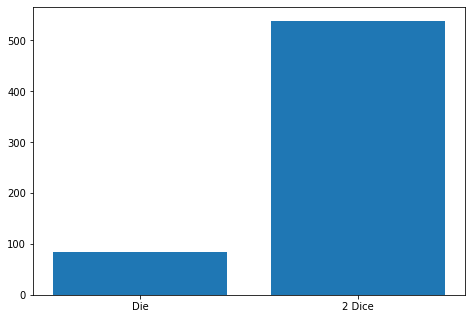

In [18]:
# try some plots

# Create figure and subplot

# Plot the decision between two and one dice 
# when such decision is possible

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

langs = ['Die', '2 Dice']
count_d = np.array([count_1d, count789])

ax.bar(langs,count_d)

plt.show()

In [14]:
def multidim_intersect(arr1, arr2):
#     if arr1.flags['F_CONTIGUOUS']:
#         arr1_rows = arr1.T.view([('', arr1.dtype)] * arr1.shape[0]).T
#         print("true")
#         print(arr1_rows)
#     if arr2.flags['F_CONTIGUOUS']:
#         print("true")
#         arr2_view = arr2.T.view([('', arr2.dtype)] * arr2.shape[0]).T
#         print(arr2_view)
#     arr1_view = arr1.view([('',arr1.dtype)]*arr1.shape[1])
#     print(arr1_view)
#     arr2_view = arr2.view([('',arr2.dtype)]*arr2.shape[1])
#     intersected = np.intersect1d(arr1_rows, arr2_view)
#     return intersected.view(arr1.dtype).reshape(-1, arr1.shape[1])



SyntaxError: unexpected EOF while parsing (751851385.py, line 15)

In [19]:
# states = np.loadtxt("rmin_strat.txt", delimiter=" ", skiprows=76, usecols=(0,2), dtype=int)
cols = [i for i in range(0,12)]
cols.append(13)
# df = pd.read_csv("~/project_files/prism-modelling-l4/shut-the-box-game/rmin_strat.txt", sep="\s+|:\(|,|\(|\)|:|=", engine="python", skiprows=77, skipfooter=12, usecols = cols)
df = pd.read_csv("~/project_files/prism-modelling-l4/shut-the-box-game/test", sep="\s+|:\(|,|\(|\)|:|=", engine="python", usecols = cols)
strat_sta_info = df.loc[:, :'p9'].values
sta = strat_sta_info[:,1:]
strategy_ids = strat_sta_info[:,0]
print(sta)
strat_sta_rew = df.rewards
# print(strat_sta_info)


[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  1  0]
 ...
 [ 1 12  1 ...  1  0  0]
 [ 1 12  1 ...  1  0  1]
 [ 1 12  1 ...  1  1  0]]


In [20]:
# states = np.loadtxt("rmin_strat.txt", delimiter=" ", skiprows=76, usecols=(0,2), dtype=int)
cols = [i for i in range(0,12)]
cols.append(13)
# df = pd.read_csv("~/project_files/prism-modelling-l4/shut-the-box-game/rmin_strat.txt", sep="\s+|:\(|,|\(|\)|:|=", engine="python", skiprows=77, skipfooter=12, usecols = cols)
dfm = pd.read_csv("~/project_files/prism-modelling-l4/shut-the-box-game/test_model", sep="\s+|:\(|,|\(|\)|:|=", engine="python", usecols = cols)
strat_stam_info = dfm.loc[:, :'p9'].values
stam = strat_stam_info[:,1:]
optimal_ids = strat_stam_info[:,0]
print(stam)
strat_stam_rew = dfm.rewards
print(strat_stam_info)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  1  0]
 ...
 [ 1 12  1 ...  1  0  0]
 [ 1 12  1 ...  1  0  1]
 [ 1 12  1 ...  1  1  0]]
[[   0    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    1]
 [   2    0    0 ...    0    1    0]
 ...
 [6192    1   12 ...    1    0    0]
 [6193    1   12 ...    1    0    1]
 [6194    1   12 ...    1    1    0]]


In [103]:
multidim_intersect(sta,stb_sta)

true
[[(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[[(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

TypeError: invalid type promotion

In [74]:
nrows, ncols = sta.shape
dtype={'names':['f{}'.format(i) for i in range(ncols)],
       'formats':ncols * [sta.dtype]}
print(sta.T.view(dtype))
# C = np.intersect1d(A.view(dtype), B.view(dtype))

ValueError: When changing to a larger dtype, its size must be a divisor of the total size in bytes of the last axis of the array.

In [21]:
#create subset sets

indices = []
print(stb_sta.shape[0])
print(sta.shape[0])
for i in range(0, stam.shape[0]):
#     any((sta[:]==[1,2]).all(1))
    if(stam[i].tolist() in sta.tolist()):
        print("here")
        print(stb_sta[i])
        indices.append(i)
print(len(indices))


6595
5447
here
[0 0 0 0 0 0 0 0 0 0 0]
here
[0 0 0 0 0 0 0 0 0 0 1]
here
[0 0 0 0 0 0 0 0 0 1 0]
here
[0 0 0 0 0 0 0 0 0 1 1]
here
[0 0 0 0 0 0 0 0 1 0 0]
here
[0 0 0 0 0 0 0 0 1 0 1]
here
[0 0 0 0 0 0 0 0 1 1 0]
here
[0 0 0 0 0 0 0 0 1 1 1]
here
[0 0 0 0 0 0 0 1 0 0 0]
here
[0 0 0 0 0 0 0 1 0 0 1]
here
[0 0 0 0 0 0 0 1 0 1 0]
here
[0 0 0 0 0 0 0 1 0 1 1]
here
[0 0 0 0 0 0 0 1 1 0 0]
here
[0 0 0 0 0 0 0 1 1 0 1]
here
[0 0 0 0 0 0 0 1 1 1 0]
here
[0 0 0 0 0 0 0 1 1 1 1]
here
[0 0 0 0 0 0 1 0 0 0 0]
here
[0 0 0 0 0 0 1 0 0 0 1]
here
[0 0 0 0 0 0 1 0 0 1 0]
here
[0 0 0 0 0 0 1 0 0 1 1]
here
[0 0 0 0 0 0 1 0 1 0 0]
here
[0 0 0 0 0 0 1 0 1 0 1]
here
[0 0 0 0 0 0 1 0 1 1 0]
here
[0 0 0 0 0 0 1 0 1 1 1]
here
[0 0 0 0 0 0 1 1 0 0 0]
here
[0 0 0 0 0 0 1 1 0 0 1]
here
[0 0 0 0 0 0 1 1 0 1 0]
here
[0 0 0 0 0 0 1 1 0 1 1]
here
[0 0 0 0 0 0 1 1 1 0 0]
here
[0 0 0 0 0 0 1 1 1 0 1]
here
[0 0 0 0 0 0 1 1 1 1 0]
here
[0 0 0 0 0 0 1 1 1 1 1]
here
[0 0 0 0 0 1 0 0 0 0 0]
here
[0 0 0 0 0 1 0 0 0 0 1]
here

here
[0 0 1 1 0 0 0 0 1 0 1]
here
[0 0 1 1 0 0 0 0 1 1 0]
here
[0 0 1 1 0 0 0 0 1 1 1]
here
[0 0 1 1 0 0 0 1 0 0 1]
here
[0 0 1 1 0 0 0 1 0 1 1]
here
[0 0 1 1 0 0 0 1 1 0 1]
here
[0 0 1 1 0 0 0 1 1 1 0]
here
[0 0 1 1 0 0 0 1 1 1 1]
here
[0 0 1 1 0 0 1 0 0 0 1]
here
[0 0 1 1 0 0 1 0 0 1 1]
here
[0 0 1 1 0 0 1 0 1 0 1]
here
[0 0 1 1 0 0 1 0 1 1 0]
here
[0 0 1 1 0 0 1 0 1 1 1]
here
[0 0 1 1 0 0 1 1 0 0 0]
here
[0 0 1 1 0 0 1 1 0 0 1]
here
[0 0 1 1 0 0 1 1 0 1 0]
here
[0 0 1 1 0 0 1 1 0 1 1]
here
[0 0 1 1 0 0 1 1 1 0 0]
here
[0 0 1 1 0 0 1 1 1 0 1]
here
[0 0 1 1 0 0 1 1 1 1 0]
here
[0 0 1 1 0 0 1 1 1 1 1]
here
[0 0 1 1 0 1 0 0 0 0 1]
here
[0 0 1 1 0 1 0 0 0 1 1]
here
[0 0 1 1 0 1 0 0 1 0 1]
here
[0 0 1 1 0 1 0 0 1 1 0]
here
[0 0 1 1 0 1 0 0 1 1 1]
here
[0 0 1 1 0 1 0 1 0 0 1]
here
[0 0 1 1 0 1 0 1 0 1 1]
here
[0 0 1 1 0 1 0 1 1 0 0]
here
[0 0 1 1 0 1 0 1 1 0 1]
here
[0 0 1 1 0 1 0 1 1 1 0]
here
[0 0 1 1 0 1 0 1 1 1 1]
here
[0 0 1 1 0 1 1 0 0 0 0]
here
[0 0 1 1 0 1 1 0 0 0 1]
here
[0 0 1 1 

here
[1 2 0 1 1 0 0 0 0 0 1]
here
[1 2 0 1 1 0 0 0 0 1 0]
here
[1 2 0 1 1 0 0 0 0 1 1]
here
[1 2 0 1 1 0 0 0 1 0 0]
here
[1 2 0 1 1 0 0 0 1 0 1]
here
[1 2 0 1 1 0 0 0 1 1 0]
here
[1 2 0 1 1 0 0 0 1 1 1]
here
[1 2 0 1 1 0 0 1 0 0 0]
here
[1 2 0 1 1 0 0 1 0 0 1]
here
[1 2 0 1 1 0 0 1 0 1 0]
here
[1 2 0 1 1 0 0 1 0 1 1]
here
[1 2 0 1 1 0 0 1 1 0 0]
here
[1 2 0 1 1 0 0 1 1 0 1]
here
[1 2 0 1 1 0 0 1 1 1 0]
here
[1 2 0 1 1 0 0 1 1 1 1]
here
[1 2 0 1 1 0 1 0 0 0 0]
here
[1 2 0 1 1 0 1 0 0 0 1]
here
[1 2 0 1 1 0 1 0 0 1 0]
here
[1 2 0 1 1 0 1 0 0 1 1]
here
[1 2 0 1 1 0 1 0 1 0 0]
here
[1 2 0 1 1 0 1 0 1 0 1]
here
[1 2 0 1 1 0 1 0 1 1 0]
here
[1 2 0 1 1 0 1 0 1 1 1]
here
[1 2 0 1 1 0 1 1 0 0 0]
here
[1 2 0 1 1 0 1 1 0 0 1]
here
[1 2 0 1 1 0 1 1 0 1 0]
here
[1 2 0 1 1 0 1 1 0 1 1]
here
[1 2 0 1 1 0 1 1 1 0 0]
here
[1 2 0 1 1 0 1 1 1 0 1]
here
[1 2 0 1 1 0 1 1 1 1 0]
here
[1 2 0 1 1 0 1 1 1 1 1]
here
[1 2 0 1 1 1 0 0 0 0 0]
here
[1 2 0 1 1 1 0 0 0 0 1]
here
[1 2 0 1 1 1 0 0 0 1 0]
here
[1 2 0 1 

[1 3 0 0 0 1 0 0 1 0 0]
here
[1 3 0 0 0 1 0 0 1 0 1]
here
[1 3 0 0 0 1 0 0 1 1 0]
here
[1 3 0 0 0 1 0 0 1 1 1]
here
[1 3 0 0 0 1 0 1 0 0 0]
here
[1 3 0 0 0 1 0 1 0 0 1]
here
[1 3 0 0 0 1 0 1 0 1 0]
here
[1 3 0 0 0 1 0 1 0 1 1]
here
[1 3 0 0 0 1 0 1 1 0 0]
here
[1 3 0 0 0 1 0 1 1 0 1]
here
[1 3 0 0 0 1 0 1 1 1 0]
here
[1 3 0 0 0 1 0 1 1 1 1]
here
[1 3 0 0 0 1 1 0 0 0 0]
here
[1 3 0 0 0 1 1 0 0 0 1]
here
[1 3 0 0 0 1 1 0 0 1 0]
here
[1 3 0 0 0 1 1 0 0 1 1]
here
[1 3 0 0 0 1 1 0 1 0 0]
here
[1 3 0 0 0 1 1 0 1 0 1]
here
[1 3 0 0 0 1 1 0 1 1 0]
here
[1 3 0 0 0 1 1 0 1 1 1]
here
[1 3 0 0 0 1 1 1 0 0 0]
here
[1 3 0 0 0 1 1 1 0 0 1]
here
[1 3 0 0 0 1 1 1 0 1 0]
here
[1 3 0 0 0 1 1 1 0 1 1]
here
[1 3 0 0 0 1 1 1 1 0 0]
here
[1 3 0 0 0 1 1 1 1 0 1]
here
[1 3 0 0 0 1 1 1 1 1 0]
here
[1 3 0 0 0 1 1 1 1 1 1]
here
[1 3 0 0 1 0 0 0 0 0 0]
here
[1 3 0 0 1 0 0 0 0 0 1]
here
[1 3 0 0 1 0 0 0 0 1 0]
here
[1 3 0 0 1 0 0 0 0 1 1]
here
[1 3 0 0 1 0 0 0 1 0 0]
here
[1 3 0 0 1 0 0 0 1 0 1]
here
[1 3 0 0 1 0 0

[1 3 1 0 1 1 0 0 1 0 1]
here
[1 3 1 0 1 1 0 0 1 1 0]
here
[1 3 1 0 1 1 0 0 1 1 1]
here
[1 3 1 0 1 1 0 1 0 0 0]
here
[1 3 1 0 1 1 0 1 0 0 1]
here
[1 3 1 0 1 1 0 1 0 1 0]
here
[1 3 1 0 1 1 0 1 0 1 1]
here
[1 3 1 0 1 1 0 1 1 0 0]
here
[1 3 1 0 1 1 0 1 1 0 1]
here
[1 3 1 0 1 1 0 1 1 1 0]
here
[1 3 1 0 1 1 0 1 1 1 1]
here
[1 3 1 0 1 1 1 0 0 0 0]
here
[1 3 1 0 1 1 1 0 0 0 1]
here
[1 3 1 0 1 1 1 0 0 1 0]
here
[1 3 1 0 1 1 1 0 0 1 1]
here
[1 3 1 0 1 1 1 0 1 0 0]
here
[1 3 1 0 1 1 1 0 1 0 1]
here
[1 3 1 0 1 1 1 0 1 1 0]
here
[1 3 1 0 1 1 1 0 1 1 1]
here
[1 3 1 0 1 1 1 1 0 0 0]
here
[1 3 1 0 1 1 1 1 0 0 1]
here
[1 3 1 0 1 1 1 1 0 1 1]
here
[1 3 1 0 1 1 1 1 1 0 1]
here
[1 3 1 0 1 1 1 1 1 1 1]
here
[1 3 1 1 0 0 0 0 0 0 0]
here
[1 3 1 1 0 0 0 0 0 0 1]
here
[1 3 1 1 0 0 0 0 0 1 1]
here
[1 3 1 1 0 0 0 0 1 0 1]
here
[1 3 1 1 0 0 0 0 1 1 1]
here
[1 3 1 1 0 0 0 1 0 0 0]
here
[1 3 1 1 0 0 0 1 0 0 1]
here
[1 3 1 1 0 0 0 1 0 1 1]
here
[1 3 1 1 0 0 0 1 1 0 1]
here
[1 3 1 1 0 0 0 1 1 1 1]
here
[1 3 1 1 0 0 1

here
[1 4 0 1 1 0 0 0 1 0 1]
here
[1 4 0 1 1 0 0 0 1 1 0]
here
[1 4 0 1 1 0 0 0 1 1 1]
here
[1 4 0 1 1 0 0 1 0 0 0]
here
[1 4 0 1 1 0 0 1 0 0 1]
here
[1 4 0 1 1 0 0 1 0 1 0]
here
[1 4 0 1 1 0 0 1 0 1 1]
here
[1 4 0 1 1 0 0 1 1 0 0]
here
[1 4 0 1 1 0 0 1 1 0 1]
here
[1 4 0 1 1 0 0 1 1 1 0]
here
[1 4 0 1 1 0 0 1 1 1 1]
here
[1 4 0 1 1 0 1 0 0 0 0]
here
[1 4 0 1 1 0 1 0 0 0 1]
here
[1 4 0 1 1 0 1 0 0 1 0]
here
[1 4 0 1 1 0 1 0 0 1 1]
here
[1 4 0 1 1 0 1 0 1 0 0]
here
[1 4 0 1 1 0 1 0 1 0 1]
here
[1 4 0 1 1 0 1 0 1 1 0]
here
[1 4 0 1 1 0 1 0 1 1 1]
here
[1 4 0 1 1 0 1 1 0 0 0]
here
[1 4 0 1 1 0 1 1 0 0 1]
here
[1 4 0 1 1 0 1 1 0 1 0]
here
[1 4 0 1 1 0 1 1 0 1 1]
here
[1 4 0 1 1 0 1 1 1 0 0]
here
[1 4 0 1 1 0 1 1 1 0 1]
here
[1 4 0 1 1 0 1 1 1 1 0]
here
[1 4 0 1 1 0 1 1 1 1 1]
here
[1 4 0 1 1 1 0 0 0 0 0]
here
[1 4 0 1 1 1 0 0 0 0 1]
here
[1 4 0 1 1 1 0 0 0 1 0]
here
[1 4 0 1 1 1 0 0 0 1 1]
here
[1 4 0 1 1 1 0 0 1 0 0]
here
[1 4 0 1 1 1 0 0 1 0 1]
here
[1 4 0 1 1 1 0 0 1 1 0]
here
[1 4 0 1 

here
[1 5 0 0 0 1 0 1 1 1 1]
here
[1 5 0 0 0 1 1 0 0 0 0]
here
[1 5 0 0 0 1 1 0 0 0 1]
here
[1 5 0 0 0 1 1 0 0 1 0]
here
[1 5 0 0 0 1 1 0 0 1 1]
here
[1 5 0 0 0 1 1 0 1 0 0]
here
[1 5 0 0 0 1 1 0 1 0 1]
here
[1 5 0 0 0 1 1 0 1 1 0]
here
[1 5 0 0 0 1 1 0 1 1 1]
here
[1 5 0 0 0 1 1 1 0 0 0]
here
[1 5 0 0 0 1 1 1 0 0 1]
here
[1 5 0 0 0 1 1 1 0 1 0]
here
[1 5 0 0 0 1 1 1 0 1 1]
here
[1 5 0 0 0 1 1 1 1 0 0]
here
[1 5 0 0 0 1 1 1 1 0 1]
here
[1 5 0 0 0 1 1 1 1 1 0]
here
[1 5 0 0 0 1 1 1 1 1 1]
here
[1 5 0 0 1 0 0 0 0 0 0]
here
[1 5 0 0 1 0 0 0 0 0 1]
here
[1 5 0 0 1 0 0 0 0 1 0]
here
[1 5 0 0 1 0 0 0 0 1 1]
here
[1 5 0 0 1 0 0 0 1 0 0]
here
[1 5 0 0 1 0 0 0 1 0 1]
here
[1 5 0 0 1 0 0 0 1 1 0]
here
[1 5 0 0 1 0 0 0 1 1 1]
here
[1 5 0 0 1 0 0 1 0 0 0]
here
[1 5 0 0 1 0 0 1 0 0 1]
here
[1 5 0 0 1 0 0 1 0 1 0]
here
[1 5 0 0 1 0 0 1 0 1 1]
here
[1 5 0 0 1 0 0 1 1 0 0]
here
[1 5 0 0 1 0 0 1 1 0 1]
here
[1 5 0 0 1 0 0 1 1 1 0]
here
[1 5 0 0 1 0 0 1 1 1 1]
here
[1 5 0 0 1 0 1 0 0 0 0]
here
[1 5 0 0 

here
[1 5 1 0 1 1 1 0 1 0 0]
here
[1 5 1 0 1 1 1 0 1 1 0]
here
[1 5 1 0 1 1 1 1 0 0 0]
here
[1 5 1 0 1 1 1 1 0 0 1]
here
[1 5 1 0 1 1 1 1 0 1 0]
here
[1 5 1 0 1 1 1 1 1 0 0]
here
[1 5 1 0 1 1 1 1 1 1 0]
here
[1 5 1 1 0 0 0 0 0 0 0]
here
[1 5 1 1 0 0 0 0 0 0 1]
here
[1 5 1 1 0 0 0 0 0 1 0]
here
[1 5 1 1 0 0 0 0 1 0 0]
here
[1 5 1 1 0 0 0 0 1 1 0]
here
[1 5 1 1 0 0 0 1 0 0 0]
here
[1 5 1 1 0 0 0 1 0 0 1]
here
[1 5 1 1 0 0 0 1 0 1 0]
here
[1 5 1 1 0 0 0 1 0 1 1]
here
[1 5 1 1 0 0 0 1 1 0 0]
here
[1 5 1 1 0 0 0 1 1 0 1]
here
[1 5 1 1 0 0 0 1 1 1 0]
here
[1 5 1 1 0 0 0 1 1 1 1]
here
[1 5 1 1 0 0 1 0 0 0 0]
here
[1 5 1 1 0 0 1 0 0 0 1]
here
[1 5 1 1 0 0 1 0 0 1 0]
here
[1 5 1 1 0 0 1 0 1 0 0]
here
[1 5 1 1 0 0 1 0 1 1 0]
here
[1 5 1 1 0 0 1 1 0 0 0]
here
[1 5 1 1 0 0 1 1 0 0 1]
here
[1 5 1 1 0 0 1 1 0 1 0]
here
[1 5 1 1 0 0 1 1 1 0 0]
here
[1 5 1 1 0 0 1 1 1 1 0]
here
[1 5 1 1 0 0 1 1 1 1 1]
here
[1 5 1 1 0 1 0 0 0 0 0]
here
[1 5 1 1 0 1 0 0 0 0 1]
here
[1 5 1 1 0 1 0 0 0 1 0]
here
[1 5 1 1 

here
[1 6 0 1 1 0 0 1 0 0 1]
here
[1 6 0 1 1 0 0 1 0 1 0]
here
[1 6 0 1 1 0 0 1 0 1 1]
here
[1 6 0 1 1 0 0 1 1 0 0]
here
[1 6 0 1 1 0 0 1 1 0 1]
here
[1 6 0 1 1 0 0 1 1 1 0]
here
[1 6 0 1 1 0 0 1 1 1 1]
here
[1 6 0 1 1 0 1 0 0 0 0]
here
[1 6 0 1 1 0 1 0 0 0 1]
here
[1 6 0 1 1 0 1 0 0 1 0]
here
[1 6 0 1 1 0 1 0 0 1 1]
here
[1 6 0 1 1 0 1 0 1 0 0]
here
[1 6 0 1 1 0 1 0 1 0 1]
here
[1 6 0 1 1 0 1 0 1 1 0]
here
[1 6 0 1 1 0 1 0 1 1 1]
here
[1 6 0 1 1 0 1 1 0 0 0]
here
[1 6 0 1 1 0 1 1 0 0 1]
here
[1 6 0 1 1 0 1 1 0 1 0]
here
[1 6 0 1 1 0 1 1 0 1 1]
here
[1 6 0 1 1 0 1 1 1 0 0]
here
[1 6 0 1 1 0 1 1 1 0 1]
here
[1 6 0 1 1 0 1 1 1 1 0]
here
[1 6 0 1 1 0 1 1 1 1 1]
here
[1 6 0 1 1 1 0 0 0 0 0]
here
[1 6 0 1 1 1 0 0 0 0 1]
here
[1 6 0 1 1 1 0 0 0 1 0]
here
[1 6 0 1 1 1 0 0 0 1 1]
here
[1 6 0 1 1 1 0 0 1 0 0]
here
[1 6 0 1 1 1 0 0 1 0 1]
here
[1 6 0 1 1 1 0 0 1 1 0]
here
[1 6 0 1 1 1 0 0 1 1 1]
here
[1 6 0 1 1 1 0 1 0 0 0]
here
[1 6 0 1 1 1 0 1 0 0 1]
here
[1 6 0 1 1 1 0 1 0 1 0]
here
[1 6 0 1 

[1 7 0 0 1 0 1 1 1 1 0]
here
[1 7 0 0 1 0 1 1 1 1 1]
here
[1 7 0 0 1 1 0 0 0 0 0]
here
[1 7 0 0 1 1 0 0 0 0 1]
here
[1 7 0 0 1 1 0 0 0 1 0]
here
[1 7 0 0 1 1 0 0 0 1 1]
here
[1 7 0 0 1 1 0 0 1 0 0]
here
[1 7 0 0 1 1 0 0 1 0 1]
here
[1 7 0 0 1 1 0 0 1 1 0]
here
[1 7 0 0 1 1 0 0 1 1 1]
here
[1 7 0 0 1 1 0 1 0 0 0]
here
[1 7 0 0 1 1 0 1 0 0 1]
here
[1 7 0 0 1 1 0 1 0 1 1]
here
[1 7 0 0 1 1 0 1 1 0 0]
here
[1 7 0 0 1 1 0 1 1 0 1]
here
[1 7 0 0 1 1 0 1 1 1 0]
here
[1 7 0 0 1 1 0 1 1 1 1]
here
[1 7 0 0 1 1 1 0 0 0 0]
here
[1 7 0 0 1 1 1 0 0 0 1]
here
[1 7 0 0 1 1 1 0 0 1 0]
here
[1 7 0 0 1 1 1 0 0 1 1]
here
[1 7 0 0 1 1 1 0 1 0 0]
here
[1 7 0 0 1 1 1 0 1 0 1]
here
[1 7 0 0 1 1 1 0 1 1 0]
here
[1 7 0 0 1 1 1 0 1 1 1]
here
[1 7 0 0 1 1 1 1 0 0 0]
here
[1 7 0 0 1 1 1 1 0 0 1]
here
[1 7 0 0 1 1 1 1 0 1 0]
here
[1 7 0 0 1 1 1 1 0 1 1]
here
[1 7 0 0 1 1 1 1 1 0 0]
here
[1 7 0 0 1 1 1 1 1 0 1]
here
[1 7 0 0 1 1 1 1 1 1 0]
here
[1 7 0 0 1 1 1 1 1 1 1]
here
[1 7 0 1 0 0 0 0 0 0 0]
here
[1 7 0 1 0 0 0

here
[1 7 1 1 1 0 1 1 1 0 0]
here
[1 7 1 1 1 0 1 1 1 0 1]
here
[1 7 1 1 1 0 1 1 1 1 0]
here
[1 7 1 1 1 0 1 1 1 1 1]
here
[1 7 1 1 1 1 0 0 0 0 0]
here
[1 7 1 1 1 1 0 0 0 0 1]
here
[1 7 1 1 1 1 0 0 0 1 0]
here
[1 7 1 1 1 1 0 0 0 1 1]
here
[1 7 1 1 1 1 0 0 1 0 0]
here
[1 7 1 1 1 1 0 0 1 0 1]
here
[1 7 1 1 1 1 0 0 1 1 0]
here
[1 7 1 1 1 1 0 0 1 1 1]
here
[1 7 1 1 1 1 0 1 0 0 0]
here
[1 7 1 1 1 1 0 1 0 0 1]
here
[1 7 1 1 1 1 0 1 0 1 0]
here
[1 7 1 1 1 1 0 1 0 1 1]
here
[1 7 1 1 1 1 0 1 1 0 0]
here
[1 7 1 1 1 1 0 1 1 0 1]
here
[1 7 1 1 1 1 0 1 1 1 0]
here
[1 7 1 1 1 1 0 1 1 1 1]
here
[1 7 1 1 1 1 1 0 0 0 0]
here
[1 7 1 1 1 1 1 0 0 0 1]
here
[1 7 1 1 1 1 1 0 0 1 0]
here
[1 7 1 1 1 1 1 0 0 1 1]
here
[1 7 1 1 1 1 1 0 1 0 0]
here
[1 7 1 1 1 1 1 0 1 0 1]
here
[1 7 1 1 1 1 1 0 1 1 0]
here
[1 7 1 1 1 1 1 0 1 1 1]
here
[1 7 1 1 1 1 1 1 0 0 0]
here
[1 7 1 1 1 1 1 1 0 0 1]
here
[1 7 1 1 1 1 1 1 0 1 0]
here
[1 7 1 1 1 1 1 1 0 1 1]
here
[1 7 1 1 1 1 1 1 1 0 0]
here
[1 7 1 1 1 1 1 1 1 0 1]
here
[1 7 1 1 

here
[1 8 1 0 1 1 1 1 0 0 0]
here
[1 8 1 0 1 1 1 1 0 0 1]
here
[1 8 1 0 1 1 1 1 0 1 0]
here
[1 8 1 0 1 1 1 1 0 1 1]
here
[1 8 1 0 1 1 1 1 1 0 0]
here
[1 8 1 0 1 1 1 1 1 0 1]
here
[1 8 1 0 1 1 1 1 1 1 0]
here
[1 8 1 0 1 1 1 1 1 1 1]
here
[1 8 1 1 0 0 0 0 0 0 0]
here
[1 8 1 1 0 0 0 0 0 1 1]
here
[1 8 1 1 0 0 0 0 1 0 1]
here
[1 8 1 1 0 0 0 0 1 1 1]
here
[1 8 1 1 0 0 0 1 0 0 0]
here
[1 8 1 1 0 0 0 1 0 0 1]
here
[1 8 1 1 0 0 0 1 0 1 1]
here
[1 8 1 1 0 0 0 1 1 0 1]
here
[1 8 1 1 0 0 0 1 1 1 0]
here
[1 8 1 1 0 0 0 1 1 1 1]
here
[1 8 1 1 0 0 1 0 0 0 0]
here
[1 8 1 1 0 0 1 0 0 0 1]
here
[1 8 1 1 0 0 1 0 0 1 0]
here
[1 8 1 1 0 0 1 0 0 1 1]
here
[1 8 1 1 0 0 1 0 1 0 0]
here
[1 8 1 1 0 0 1 0 1 0 1]
here
[1 8 1 1 0 0 1 0 1 1 0]
here
[1 8 1 1 0 0 1 0 1 1 1]
here
[1 8 1 1 0 0 1 1 0 0 0]
here
[1 8 1 1 0 0 1 1 0 0 1]
here
[1 8 1 1 0 0 1 1 0 1 0]
here
[1 8 1 1 0 0 1 1 0 1 1]
here
[1 8 1 1 0 0 1 1 1 0 0]
here
[1 8 1 1 0 0 1 1 1 0 1]
here
[1 8 1 1 0 0 1 1 1 1 0]
here
[1 8 1 1 0 0 1 1 1 1 1]
here
[1 8 1 1 

here
[1 9 0 1 0 1 1 1 0 0 0]
here
[1 9 0 1 0 1 1 1 0 0 1]
here
[1 9 0 1 0 1 1 1 0 1 0]
here
[1 9 0 1 0 1 1 1 0 1 1]
here
[1 9 0 1 0 1 1 1 1 0 1]
here
[1 9 0 1 0 1 1 1 1 1 0]
here
[1 9 0 1 0 1 1 1 1 1 1]
here
[1 9 0 1 1 0 0 0 0 0 0]
here
[1 9 0 1 1 0 0 0 0 0 1]
here
[1 9 0 1 1 0 0 0 0 1 0]
here
[1 9 0 1 1 0 0 0 0 1 1]
here
[1 9 0 1 1 0 0 0 1 0 0]
here
[1 9 0 1 1 0 0 0 1 0 1]
here
[1 9 0 1 1 0 0 0 1 1 0]
here
[1 9 0 1 1 0 0 0 1 1 1]
here
[1 9 0 1 1 0 0 1 0 0 0]
here
[1 9 0 1 1 0 0 1 0 0 1]
here
[1 9 0 1 1 0 0 1 0 1 0]
here
[1 9 0 1 1 0 0 1 0 1 1]
here
[1 9 0 1 1 0 0 1 1 0 0]
here
[1 9 0 1 1 0 0 1 1 0 1]
here
[1 9 0 1 1 0 0 1 1 1 0]
here
[1 9 0 1 1 0 0 1 1 1 1]
here
[1 9 0 1 1 0 1 0 0 0 0]
here
[1 9 0 1 1 0 1 0 0 0 1]
here
[1 9 0 1 1 0 1 0 0 1 0]
here
[1 9 0 1 1 0 1 0 0 1 1]
here
[1 9 0 1 1 0 1 0 1 0 0]
here
[1 9 0 1 1 0 1 0 1 0 1]
here
[1 9 0 1 1 0 1 0 1 1 0]
here
[1 9 0 1 1 0 1 0 1 1 1]
here
[1 9 0 1 1 0 1 1 0 0 0]
here
[1 9 0 1 1 0 1 1 0 0 1]
here
[1 9 0 1 1 0 1 1 0 1 0]
here
[1 9 0 1 

here
[ 1 10  0  0  1  1  0  1  0  0  0]
here
[ 1 10  0  0  1  1  0  1  0  0  1]
here
[ 1 10  0  0  1  1  0  1  0  1  0]
here
[ 1 10  0  0  1  1  0  1  0  1  1]
here
[ 1 10  0  0  1  1  0  1  1  0  0]
here
[ 1 10  0  0  1  1  0  1  1  0  1]
here
[ 1 10  0  0  1  1  0  1  1  1  0]
here
[ 1 10  0  0  1  1  0  1  1  1  1]
here
[ 1 10  0  0  1  1  1  0  0  0  0]
here
[ 1 10  0  0  1  1  1  0  0  0  1]
here
[ 1 10  0  0  1  1  1  0  0  1  0]
here
[ 1 10  0  0  1  1  1  0  1  0  0]
here
[ 1 10  0  0  1  1  1  0  1  0  1]
here
[ 1 10  0  0  1  1  1  0  1  1  0]
here
[ 1 10  0  0  1  1  1  0  1  1  1]
here
[ 1 10  0  0  1  1  1  1  0  0  0]
here
[ 1 10  0  0  1  1  1  1  0  0  1]
here
[ 1 10  0  0  1  1  1  1  0  1  0]
here
[ 1 10  0  0  1  1  1  1  0  1  1]
here
[ 1 10  0  0  1  1  1  1  1  0  0]
here
[ 1 10  0  0  1  1  1  1  1  0  1]
here
[ 1 10  0  0  1  1  1  1  1  1  0]
here
[ 1 10  0  0  1  1  1  1  1  1  1]
here
[ 1 10  0  1  0  0  0  0  0  0  0]
here
[ 1 10  0  1  0  0  0  0  0  0  1]


here
[ 1 10  1  0  1  1  0  1  0  1  0]
here
[ 1 10  1  0  1  1  0  1  0  1  1]
here
[ 1 10  1  0  1  1  0  1  1  0  0]
here
[ 1 10  1  0  1  1  0  1  1  0  1]
here
[ 1 10  1  0  1  1  1  0  0  0  0]
here
[ 1 10  1  0  1  1  1  0  0  1  0]
here
[ 1 10  1  0  1  1  1  0  1  0  0]
here
[ 1 10  1  0  1  1  1  0  1  0  1]
here
[ 1 10  1  0  1  1  1  0  1  1  0]
here
[ 1 10  1  0  1  1  1  1  0  0  0]
here
[ 1 10  1  0  1  1  1  1  0  1  0]
here
[ 1 10  1  0  1  1  1  1  0  1  1]
here
[ 1 10  1  0  1  1  1  1  1  0  0]
here
[ 1 10  1  0  1  1  1  1  1  0  1]
here
[ 1 10  1  0  1  1  1  1  1  1  0]
here
[ 1 10  1  0  1  1  1  1  1  1  1]
here
[ 1 10  1  1  0  0  0  0  0  0  0]
here
[ 1 10  1  1  0  0  0  0  0  0  1]
here
[ 1 10  1  1  0  0  0  0  0  1  0]
here
[ 1 10  1  1  0  0  0  0  0  1  1]
here
[ 1 10  1  1  0  0  0  0  1  0  0]
here
[ 1 10  1  1  0  0  0  0  1  0  1]
here
[ 1 10  1  1  0  0  0  0  1  1  0]
here
[ 1 10  1  1  0  0  0  0  1  1  1]
here
[ 1 10  1  1  0  0  0  1  0  0  0]


[ 1 11  0  1  0  0  0  0  0  1  1]
here
[ 1 11  0  1  0  0  0  0  1  0  0]
here
[ 1 11  0  1  0  0  0  0  1  0  1]
here
[ 1 11  0  1  0  0  0  0  1  1  0]
here
[ 1 11  0  1  0  0  0  0  1  1  1]
here
[ 1 11  0  1  0  0  0  1  0  0  1]
here
[ 1 11  0  1  0  0  0  1  0  1  0]
here
[ 1 11  0  1  0  0  0  1  0  1  1]
here
[ 1 11  0  1  0  0  0  1  1  0  0]
here
[ 1 11  0  1  0  0  0  1  1  0  1]
here
[ 1 11  0  1  0  0  0  1  1  1  0]
here
[ 1 11  0  1  0  0  0  1  1  1  1]
here
[ 1 11  0  1  0  0  1  0  0  0  0]
here
[ 1 11  0  1  0  0  1  0  0  0  1]
here
[ 1 11  0  1  0  0  1  0  0  1  0]
here
[ 1 11  0  1  0  0  1  0  0  1  1]
here
[ 1 11  0  1  0  0  1  0  1  0  0]
here
[ 1 11  0  1  0  0  1  0  1  0  1]
here
[ 1 11  0  1  0  0  1  0  1  1  0]
here
[ 1 11  0  1  0  0  1  0  1  1  1]
here
[ 1 11  0  1  0  0  1  1  0  0  0]
here
[ 1 11  0  1  0  0  1  1  0  0  1]
here
[ 1 11  0  1  0  0  1  1  0  1  0]
here
[ 1 11  0  1  0  0  1  1  0  1  1]
here
[ 1 11  0  1  0  0  1  1  1  0  0]
here


here
[ 1 11  1  1  0  1  0  1  1  1  1]
here
[ 1 11  1  1  0  1  1  0  0  0  0]
here
[ 1 11  1  1  0  1  1  0  0  0  1]
here
[ 1 11  1  1  0  1  1  0  0  1  0]
here
[ 1 11  1  1  0  1  1  0  0  1  1]
here
[ 1 11  1  1  0  1  1  0  1  0  0]
here
[ 1 11  1  1  0  1  1  0  1  0  1]
here
[ 1 11  1  1  0  1  1  0  1  1  0]
here
[ 1 11  1  1  0  1  1  0  1  1  1]
here
[ 1 11  1  1  0  1  1  1  0  0  0]
here
[ 1 11  1  1  0  1  1  1  0  0  1]
here
[ 1 11  1  1  0  1  1  1  0  1  0]
here
[ 1 11  1  1  0  1  1  1  0  1  1]
here
[ 1 11  1  1  0  1  1  1  1  0  0]
here
[ 1 11  1  1  0  1  1  1  1  0  1]
here
[ 1 11  1  1  0  1  1  1  1  1  0]
here
[ 1 11  1  1  0  1  1  1  1  1  1]
here
[ 1 11  1  1  1  0  0  0  0  0  0]
here
[ 1 11  1  1  1  0  0  0  0  0  1]
here
[ 1 11  1  1  1  0  0  0  0  1  0]
here
[ 1 11  1  1  1  0  0  0  0  1  1]
here
[ 1 11  1  1  1  0  0  0  1  0  0]
here
[ 1 11  1  1  1  0  0  0  1  0  1]
here
[ 1 11  1  1  1  0  0  0  1  1  0]
here
[ 1 11  1  1  1  0  0  0  1  1  1]


here
[ 1 12  0  1  0  1  0  1  1  1  1]
here
[ 1 12  0  1  0  1  1  0  0  0  0]
here
[ 1 12  0  1  0  1  1  0  0  0  1]
here
[ 1 12  0  1  0  1  1  0  0  1  0]
here
[ 1 12  0  1  0  1  1  0  0  1  1]
here
[ 1 12  0  1  0  1  1  0  1  0  0]
here
[ 1 12  0  1  0  1  1  0  1  0  1]
here
[ 1 12  0  1  0  1  1  0  1  1  0]
here
[ 1 12  0  1  0  1  1  0  1  1  1]
here
[ 1 12  0  1  0  1  1  1  0  0  0]
here
[ 1 12  0  1  0  1  1  1  0  0  1]
here
[ 1 12  0  1  0  1  1  1  0  1  1]
here
[ 1 12  0  1  0  1  1  1  1  0  1]
here
[ 1 12  0  1  0  1  1  1  1  1  1]
here
[ 1 12  0  1  1  0  0  0  0  0  0]
here
[ 1 12  0  1  1  0  0  0  0  0  1]
here
[ 1 12  0  1  1  0  0  0  0  1  1]
here
[ 1 12  0  1  1  0  0  0  1  0  1]
here
[ 1 12  0  1  1  0  0  0  1  1  1]
here
[ 1 12  0  1  1  0  0  1  0  0  0]
here
[ 1 12  0  1  1  0  0  1  0  0  1]
here
[ 1 12  0  1  1  0  0  1  0  1  1]
here
[ 1 12  0  1  1  0  0  1  1  0  1]
here
[ 1 12  0  1  1  0  0  1  1  1  1]
here
[ 1 12  0  1  1  0  1  0  0  0  0]


In [22]:
arr = np.array(indices)

In [23]:
#rewards for the optimal model
stam_states = stam[indices]
print(stam_states)
# file = "common_states_check.txt"
# np.savetxt(file, stam_states, delimiter=",", fmt="%d")
filtered_rewards = strat_stam_rew.values[arr]
filter_optimal_ids = optimal_ids[arr]

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  1  0]
 ...
 [ 1 12  1 ...  1  0  0]
 [ 1 12  1 ...  1  0  1]
 [ 1 12  1 ...  1  1  0]]


In [ ]:
# join ids from optimal strategy with rewards -> won't work as two different datatypes
# join ids of strategy with rewards -> won't work as two different datatypes


In [24]:
# substract the rewards:
# strategy reward from optimal
# the higher the reward the bigger the strategy
# <0 means strategy has better than optimal result
# >0 means strategy is bad
# =0 strategy is optimal
# strategy 
rewards_difference = strat_sta_rew - filtered_rewards
# file = "rewards_difference.txt"
# np.savetxt(file, rewards_difference, delimiter=",", fmt="%1.6f")
sort_rewards_difference_args = np.argsort(rewards_difference)
sorted_array_difference = rewards_difference[sort_rewards_difference_args]
max_diff_index = np.argmax(rewards_difference)
max_reward_difference = rewards_difference[max_diff_index]
print(max_diff_index)
print(max_reward_difference)
print(sorted_array_difference)
# file = "sorted_array_difference.txt"
# np.savetxt(file, sorted_array_difference, delimiter=",", fmt="%1.16f")

5192
2.6937157064471826
2723    0.000000
2836    0.000000
2837    0.000000
2838    0.000000
2843    0.000000
          ...   
4166    2.174146
4152    2.390411
2343    2.521143
2344    2.641890
5192    2.693716
Name: rewards, Length: 5447, dtype: float64


In [44]:
# descending order
largest_indices = np.argsort(-1*rewards_difference)
sorted_array_difference_new = rewards_difference[largest_indices][42:]
print(sorted_array_difference_new)

4381    0.898320
5071    0.878406
3703    0.870370
2797    0.863250
3814    0.846965
          ...   
2421    0.000000
2422    0.000000
2423    0.000000
2282    0.000000
5446    0.000000
Name: rewards, Length: 5405, dtype: float64


In [45]:
# find the state of largest difference
# state_id -> strategy
sta_strategy_id = strategy_ids[5071]
print(sta_strategy_id)
# state_id -> optimal
sta_optimal_id = filter_optimal_ids[5071]
print(sta_optimal_id)

5125
5750
